Predicting stock prices is an uncertain task which is modelled using machine learning to predict the return on stocks. In this task, the future stock prices of BlackRock (BLK) are predicted using the LSTM and GRU Recurrent Neural Network.

### Loading Stock Market Data

In [1]:
# Required Packages
import time
import math
import warnings
import numpy as np
import pandas as pd
import tensorflow as tf
import pandas_datareader as pdr
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')
print(f'Tensorflow version: {tf.__version__}')

Tensorflow version: 2.5.0


In [2]:
# Fetch Stock Prices
dataset = pdr.DataReader('BLK', data_source='yahoo', start='2013-01-01', end='2019-12-31')
dataset.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,212.869995,208.770004,210.619995,212.770004,951600.0,171.830475
2013-01-03,215.990005,212.169998,213.309998,213.350006,596200.0,172.298859
2013-01-04,218.860001,213.020004,213.029999,218.029999,805200.0,176.078369
2013-01-07,218.289993,215.250000,217.679993,217.630005,722300.0,175.755356
2013-01-08,217.440002,214.050003,217.020004,214.259995,630400.0,173.033798


We are going to consider the close price of BlackRock stock.

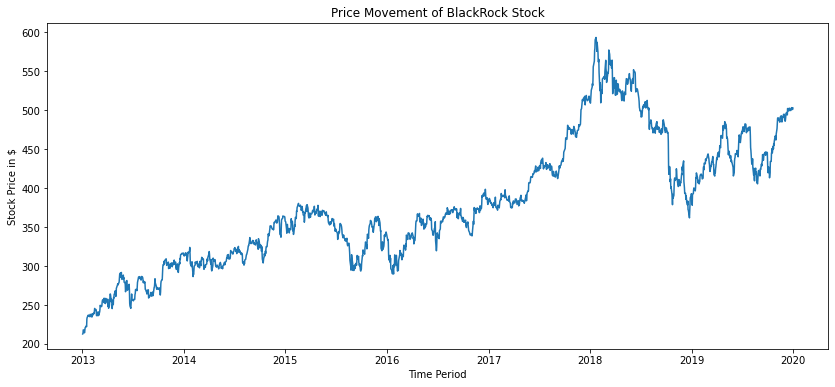

In [3]:
# Plotting the prices
plt.figure(figsize=(14, 6))
plt.plot(dataset['Close']);
plt.xlabel('Time Period');
plt.ylabel('Stock Price in $');
plt.title('Price Movement of BlackRock Stock');

In [4]:
data = dataset.filter(['Close'])
data = data.values

In [5]:
# Scaling the close price of BlackRock
scaler = MinMaxScaler()
scaled_price = scaler.fit_transform(data)
# Top 10 scaled values
print(f'Scaled values: \n {scaled_price[:10]}')

Scaled values: 
 [[0.        ]
 [0.00152435]
 [0.01382426]
 [0.012773  ]
 [0.00391598]
 [0.0053878 ]
 [0.01571656]
 [0.02165626]
 [0.02475754]
 [0.02754342]]


In [6]:
train_size = math.ceil(len(data)*0.7)

train_data = scaled_price[0:train_size, :]

X_train = []
y_train = []

for i in range(60, train_size):
  X_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

print(f'X_train: \n{X_train[0]}')  # Should have 60 values in each list
print(f'y_train: {y_train[0]}')    # Single valued y label
print(f'X_train size: {len(X_train)}')  # Total length of X_train column
print(f'y_train size: {len(y_train)}')  # Total length of y_train column

X_train: 
[0.         0.00152435 0.01382426 0.012773   0.00391598 0.0053878
 0.01571656 0.02165626 0.02475754 0.02754342 0.02488896 0.05054008
 0.05561247 0.06357592 0.06102657 0.06192015 0.06215668 0.05805671
 0.06633549 0.06473229 0.06178873 0.06339193 0.05705798 0.06856947
 0.06841178 0.06320798 0.06672974 0.07012009 0.06856947 0.07818865
 0.08620464 0.07931875 0.08239373 0.06925278 0.06163105 0.07385211
 0.06236694 0.06144705 0.07437778 0.07090855 0.06323424 0.07490341
 0.08310335 0.0967174  0.09382637 0.09330074 0.09224944 0.09637572
 0.10757179 0.11372179 0.11556147 0.1116455  0.10620512 0.12071278
 0.10573207 0.10607375 0.10263082 0.11995059 0.11511473 0.11592946]
y_train: 0.10562695960782165
X_train size: 1174
y_train size: 1174


In [7]:
test_data = scaled_price[train_size-60:, :]

X_test = []
y_test = data[train_size:, :]

for i in range(60, len(test_data)):
  X_test.append(test_data[i-60:i, 0])

print(f'X_test: \n{X_test[0]}')  # Should have 60 values in each list
print(f'X_test size: {len(X_test)}')  # Total length of X_train column
print(f'y_test size: {len(y_test)}')  # Total length of y_train column

X_test: 
[0.5346527  0.54203791 0.54931796 0.52795077 0.52411363 0.5295277
 0.53399565 0.5552577  0.56716339 0.55914737 0.55959419 0.56755761
 0.56944991 0.5772031  0.58161844 0.58046203 0.58535042 0.59097479
 0.58248571 0.59299847 0.61326179 0.61583744 0.62335411 0.62556178
 0.64427448 0.66141025 0.65823016 0.65620648 0.66419612 0.68637805
 0.70388181 0.69047802 0.69696965 0.69063571 0.69576071 0.69389472
 0.69344789 0.68758708 0.68582615 0.67381531 0.68519541 0.68953191
 0.68206786 0.67823065 0.67418329 0.68898001 0.69999206 0.69079339
 0.68490627 0.68183133 0.66711345 0.6650897  0.6631974  0.677232
 0.67736338 0.68661458 0.68653574 0.68858572 0.70590548 0.69954531]
X_test size: 528
y_test size: 528


In [8]:
# Converting array as sequential model takes array data type as input
X_train = np.array(X_train)
y_train = np.array(X_train)
X_test = np.array(X_test)

In [9]:
# Reshaping the X_train and X_test to 3D tensor as sequential model takes 3D tensor as input
new_shape_train = (X_train.shape[0], X_train.shape[1], 1)
X_train = np.reshape(X_train, newshape=new_shape_train)
X_train.shape

(1174, 60, 1)

In [10]:
new_shape_test = (X_test.shape[0], X_test.shape[1], 1)
X_test = np.reshape(X_test, newshape=new_shape_test)
X_test.shape

(528, 60, 1)

### LSTM

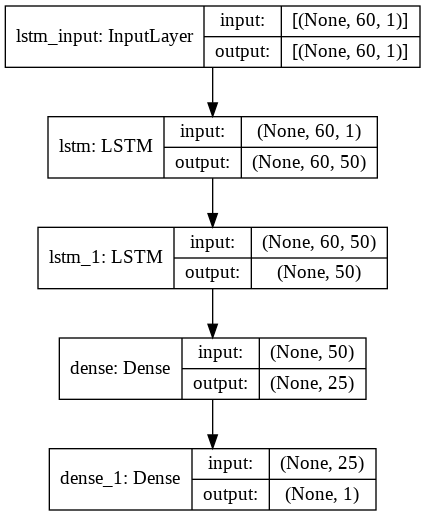

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(tf.keras.layers.LSTM(units=50, return_sequences=False))
model.add(tf.keras.layers.Dense(25))
model.add(tf.keras.layers.Dense(1))

tf.keras.utils.plot_model(model, show_shapes=True)

In [12]:
start = time.time()
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=100, epochs=20)
end = time.time()
print(f'Time taken: {round((end - start)/60, 1)} minutes.')

Epoch 1/20
12/12 [==============================] - 5s 93ms/step - loss: 0.0276
Epoch 2/20
12/12 [==============================] - 1s 93ms/step - loss: 0.0057
Epoch 3/20
12/12 [==============================] - 1s 93ms/step - loss: 0.0040
Epoch 4/20
12/12 [==============================] - 1s 92ms/step - loss: 0.0031
Epoch 5/20
12/12 [==============================] - 1s 92ms/step - loss: 0.0025
Epoch 6/20
12/12 [==============================] - 1s 92ms/step - loss: 0.0021
Epoch 7/20
12/12 [==============================] - 1s 90ms/step - loss: 0.0020
Epoch 8/20
12/12 [==============================] - 1s 91ms/step - loss: 0.0020
Epoch 9/20
12/12 [==============================] - 1s 93ms/step - loss: 0.0019
Epoch 10/20
12/12 [==============================] - 1s 92ms/step - loss: 0.0019
Epoch 11/20
12/12 [==============================] - 1s 90ms/step - loss: 0.0019
Epoch 12/20
12/12 [==============================] - 1s 89ms/step - loss: 0.0019
Epoch 13/20
12/12 [==================

In [13]:
predictions_lstm = model.predict(X_test)
predictions_lstm = scaler.inverse_transform(predictions_lstm)  # It inverts the transform for you when you make predictions. Returns predictions in original form

In [14]:
# Root Mean Square Error
rmse_lstm = np.sqrt(np.mean(predictions_lstm - y_test)**2)
rmse_lstm

20.89255338726622

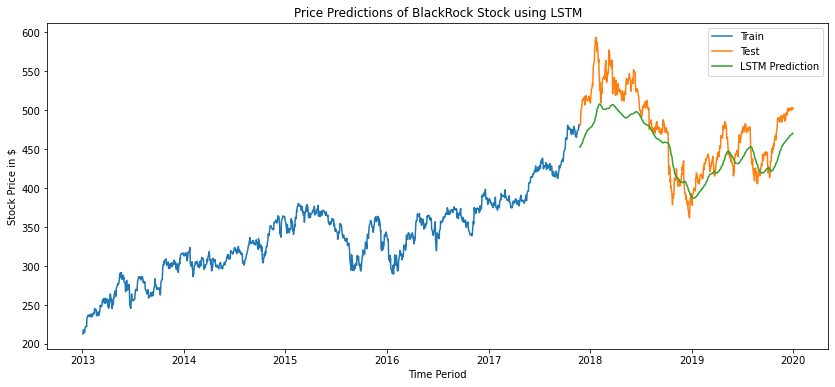

In [15]:
train = dataset.iloc[:train_size, :]
test = dataset.iloc[train_size:, :]
test.loc[:,'LSTM Predictions'] = predictions_lstm
plt.figure(figsize=(14, 6))
plt.plot(train['Close']);
plt.plot(test[['Close', 'LSTM Predictions']]);
plt.xlabel('Time Period');
plt.ylabel('Stock Price in $');
plt.legend(['Train', 'Test', 'LSTM Prediction'], loc='best')
plt.title('Price Predictions of BlackRock Stock using LSTM');

### GRU

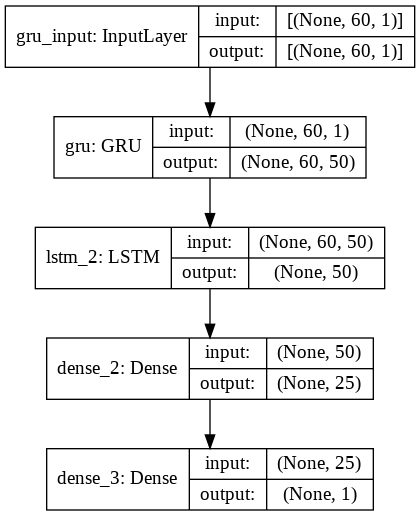

In [16]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(tf.keras.layers.LSTM(units=50, return_sequences=False))
model.add(tf.keras.layers.Dense(25))
model.add(tf.keras.layers.Dense(1))

tf.keras.utils.plot_model(model, show_shapes=True)

In [17]:
start = time.time()
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=100, epochs=20)
end = time.time()
print(f'Time taken: {round((end - start)/60, 1)} minutes.')

Epoch 1/20
12/12 [==============================] - 5s 93ms/step - loss: 0.0436
Epoch 2/20
12/12 [==============================] - 1s 91ms/step - loss: 0.0065
Epoch 3/20
12/12 [==============================] - 1s 93ms/step - loss: 0.0041
Epoch 4/20
12/12 [==============================] - 1s 95ms/step - loss: 0.0031
Epoch 5/20
12/12 [==============================] - 1s 92ms/step - loss: 0.0026
Epoch 6/20
12/12 [==============================] - 1s 92ms/step - loss: 0.0023
Epoch 7/20
12/12 [==============================] - 1s 90ms/step - loss: 0.0022
Epoch 8/20
12/12 [==============================] - 1s 94ms/step - loss: 0.0022
Epoch 9/20
12/12 [==============================] - 1s 92ms/step - loss: 0.0022
Epoch 10/20
12/12 [==============================] - 1s 89ms/step - loss: 0.0022
Epoch 11/20
12/12 [==============================] - 1s 90ms/step - loss: 0.0022
Epoch 12/20
12/12 [==============================] - 1s 91ms/step - loss: 0.0021
Epoch 13/20
12/12 [==================

In [18]:
predictions_gru = model.predict(X_test)
predictions_gru = scaler.inverse_transform(predictions_gru) 

In [19]:
# Root Mean Square Error
rmse_gru = np.sqrt(np.mean(predictions_gru - y_test)**2)
rmse_gru

18.987350868456293

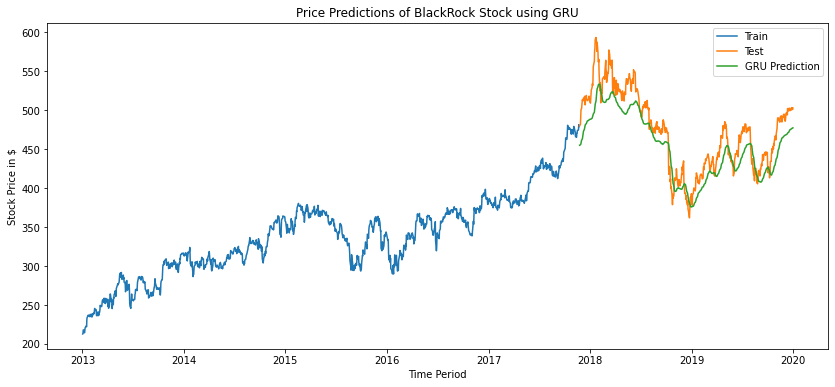

In [20]:
test.loc[:,'GRU Predictions'] = predictions_gru
plt.figure(figsize=(14, 6))
plt.plot(train['Close']);
plt.plot(test[['Close', 'GRU Predictions']]);
plt.xlabel('Time Period');
plt.ylabel('Stock Price in $');
plt.legend(['Train', 'Test', 'GRU Prediction'], loc='best')
plt.title('Price Predictions of BlackRock Stock using GRU');

- It can be observed that training time was much less in case of GRU (0.4 mins) as compared to LSTM (0.7 mins).
- Similarly RMSE was less for GRU (20) as compared to LSTM (18)
- We can say that GRUs are better approximations to LSTM considering both time complexity wise and performance wise.